# Experiment of a Deep Reinforcement Learning agent for the Tpeir stock of Athex, trying to achieve profit through automated trading.

In [1]:
# Run the main script file of the agent.  
# !python main.py

In [ ]:
# Import the necessary libraries.
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys


sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)  # Set default figure size

In [ ]:
# Base directory containing all training subdirectories
base_train_dir = '/Volumes/Lexternal/Final Files Thesis/4 - DRL/DRL_for_Active_High_Frequency_Trading-main/runs/1738173416.8677702/'

# Initialize a list to hold DataFrames
dfs = []

# Iterate through each subdirectory
for subdir in os.listdir(base_train_dir):
    subdir_path = os.path.join(base_train_dir, subdir)
    if os.path.isdir(subdir_path):
        progress_csv = os.path.join(subdir_path, 'progress.csv')
        if os.path.exists(progress_csv):
            df = pd.read_csv(progress_csv)
            df['environment'] = subdir  # Label data by environment
            dfs.append(df)

# Concatenate all DataFrames
if dfs:
    training_data = pd.concat(dfs, ignore_index=True)
else:
    raise FileNotFoundError("No progress.csv files found in the training directories.")

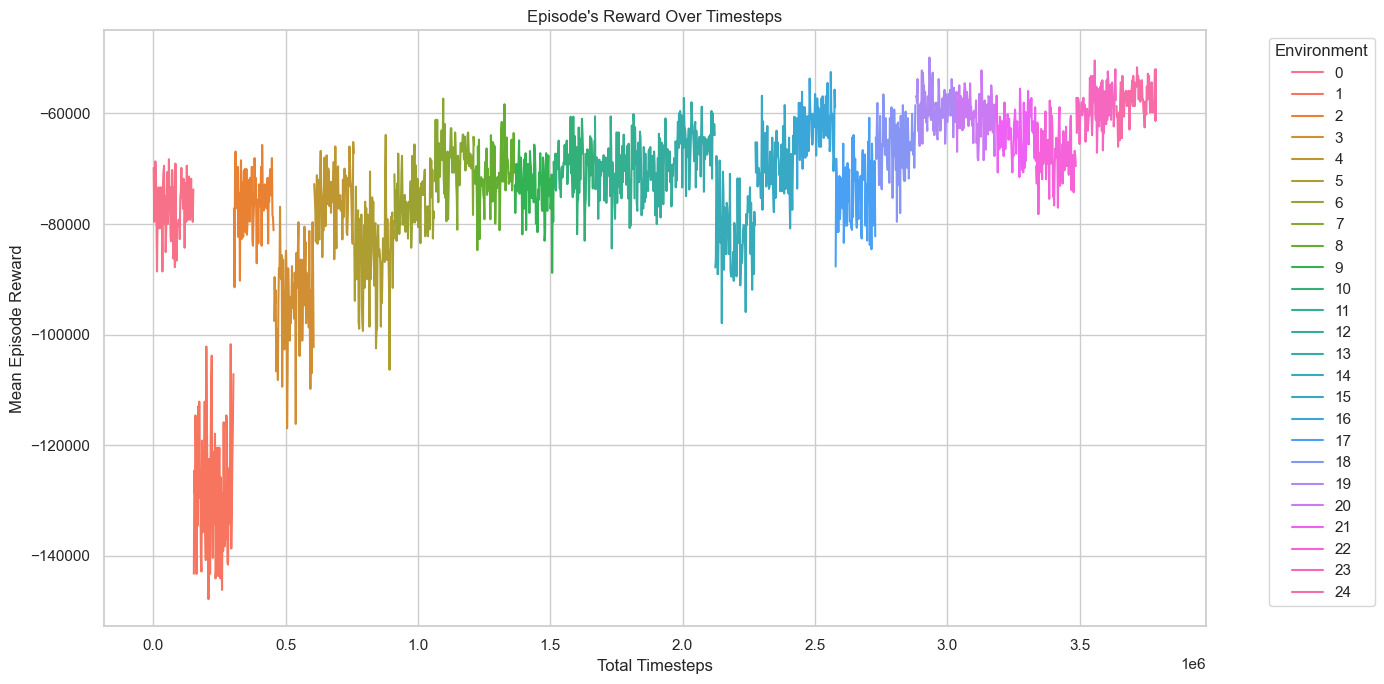

In [3]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=training_data, x='time/total_timesteps', y='rollout/ep_rew_mean', hue='environment')
plt.title("Episode's Reward Over Timesteps")
plt.xlabel('Total Timesteps')
plt.ylabel('Mean Episode Reward')
plt.legend(title='Environment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

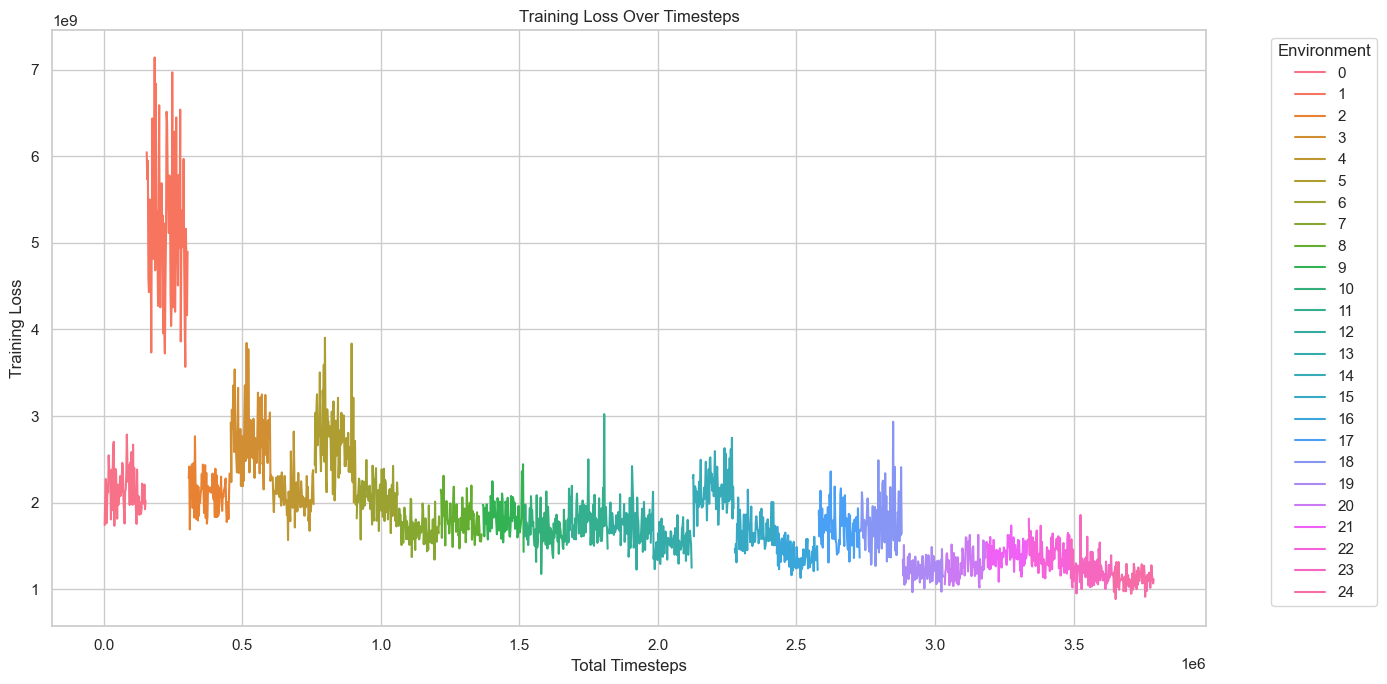

In [4]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=training_data, x='time/total_timesteps', y='train/loss', hue='environment')
plt.title('Training Loss Over Timesteps')
plt.xlabel('Total Timesteps')
plt.ylabel('Training Loss')
plt.legend(title='Environment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Add the directory containing 'environment.py' to sys.path
env_module_dir = '/Volumes/Lexternal/Final Files Thesis/4 - DRL/DRL_for_Active_High_Frequency_Trading-main'
if env_module_dir not in sys.path:
    sys.path.append(env_module_dir)

# Define the path to the evaluation run directory
eval_run_dir = '/Volumes/Lexternal/Final Files Thesis/4 - DRL/DRL_for_Active_High_Frequency_Trading-main/run_rsults1738173416.8677702/'

# Initialize a list to hold evaluation data
eval_data_list = []

# Iterate through each .npy file in the evaluation directory
for file in os.listdir(eval_run_dir):
    if file.endswith('.npy'):
        file_path = os.path.join(eval_run_dir, file)
        data = np.load(file_path, allow_pickle=True)
        # data is a list containing one list
        record = data[0]
        # record structure: [file_name, j, env_steps, env_pos, profit_per_trade, env_reward]
        eval_data_list.append({
            'file_name': record[0],
            'env_steps': record[1],
            'env_pos': record[2],
            'profit_per_trade': record[3],
            'env_reward': record[4]
        })

# Convert to DataFrame
eval_df = pd.DataFrame(eval_data_list)

# Display the first few rows
print(eval_df)


                                            file_name  env_steps  env_pos  \
0   TPEIR_2024-04-11_10:30:00_16:59:59_orderbook_1...          2        1   
1   TPEIR_2024-04-09_10:30:01_16:59:59_orderbook_1...          2        1   
2   TPEIR_2024-04-10_10:30:00_16:59:57_orderbook_1...          2        1   
3   TPEIR_2024-04-05_10:30:00_16:59:55_orderbook_1...          2        1   
4   TPEIR_2024-04-04_10:30:00_16:59:59_orderbook_1...          2        1   
5   TPEIR_2024-04-08_10:30:00_16:59:59_orderbook_1...          2        1   
6   TPEIR_2024-04-02_10:30:00_16:59:58_orderbook_1...          2        1   
7   TPEIR_2024-04-03_10:30:00_16:59:58_orderbook_1...          2        1   
8   TPEIR_2024-04-19_10:30:01_16:59:55_orderbook_1...          2        1   
9   TPEIR_2024-04-18_10:30:07_16:59:58_orderbook_1...          2        1   
10  TPEIR_2024-04-22_10:30:01_16:59:59_orderbook_1...          2        1   
11  TPEIR_2024-04-23_10:30:00_16:59:59_orderbook_1...          2        1   

In [7]:
eval_df = eval_df.sort_values(by='file_name', ascending=True)

In [ ]:
# 1) Extract the date from 'file_name' using a regex capturing group.
eval_df['date_str'] = eval_df['file_name'].str.extract(r'TPEIR_(\d{4}-\d{2}-\d{2})')

# 2) Convert the extracted string to datetime
eval_df['date'] = pd.to_datetime(eval_df['date_str'])

# 3) Sort the dataframe by 'date'
eval_df.sort_values('date', inplace=True)

# 4) Calculate the cumulative sum of env_reward
eval_df['cumulative_env_reward'] = eval_df['env_reward'].cumsum()




In [10]:
eval_df.dtypes

file_name                        object
env_steps                         int64
env_pos                           int64
profit_per_trade                 object
env_reward                      float64
date_str                         object
date                     datetime64[ns]
cumulative_env_reward           float64
dtype: object

In [11]:
eval_df['cumulative_env_reward'] = eval_df['cumulative_env_reward'].astype(int)

In [12]:
eval_df

,file_name,env_steps,env_pos,profit_per_trade,env_reward,date_str,date,cumulative_env_reward
6,TPEIR_2024-04-02_10:30:00_16:59:58_orderbook_1...,2,1,"[[-80.0, 1, 2, Position.short, 3]]",-80.0,2024-04-02,2024-04-02,-80
7,TPEIR_2024-04-03_10:30:00_16:59:58_orderbook_1...,2,1,"[[-80.0, 1, 2, Position.short, 3]]",-80.0,2024-04-03,2024-04-03,-160
4,TPEIR_2024-04-04_10:30:00_16:59:59_orderbook_1...,2,1,"[[-160.0, 1, 2, Position.short, 3]]",-160.0,2024-04-04,2024-04-04,-320
3,TPEIR_2024-04-05_10:30:00_16:59:55_orderbook_1...,2,1,"[[-20.0, 1, 2, Position.short, 3]]",-20.0,2024-04-05,2024-04-05,-340
5,TPEIR_2024-04-08_10:30:00_16:59:59_orderbook_1...,2,1,"[[-100.0, 1, 2, Position.short, 3]]",-100.0,2024-04-08,2024-04-08,-440
1,TPEIR_2024-04-09_10:30:01_16:59:59_orderbook_1...,2,1,"[[-90.0, 1, 2, Position.short, 3]]",-90.0,2024-04-09,2024-04-09,-530
2,TPEIR_2024-04-10_10:30:00_16:59:57_orderbook_1...,2,1,"[[-30.0, 1, 2, Position.short, 3]]",-30.0,2024-04-10,2024-04-10,-560
0,TPEIR_2024-04-11_10:30:00_16:59:59_orderbook_1...,2,1,"[[-180.0, 1, 2, Position.short, 3]]",-180.0,2024-04-11,2024-04-11,-740
15,TPEIR_2024-04-12_10:30:00_16:59:59_orderbook_1...,2,1,"[[-80.0, 1, 2, Position.short, 3]]",-80.0,2024-04-12,2024-04-12,-820
12,TPEIR_2024-04-15_10:30:01_16:59:59_orderbook_1...,2,1,"[[-230.0, 1, 2, Position.short, 3]]",-230.0,2024-04-15,2024-04-15,-1050


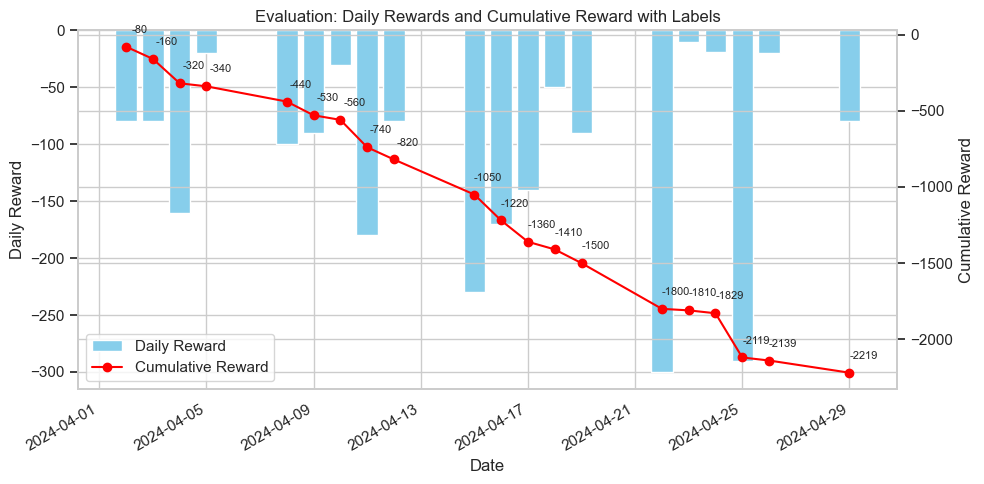

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# --- BAR PLOT: Daily env_reward (left y-axis) ---
ax1.bar(eval_df['date'], eval_df['env_reward'], color='skyblue', label='Daily Reward')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Reward')

# --- LINE PLOT: Cumulative env_reward (right y-axis) ---
ax2 = ax1.twinx()
ax2.plot(eval_df['date'], eval_df['cumulative_env_reward'], color='red', marker='o', label='Cumulative Reward')
ax2.set_ylabel('Cumulative Reward')

# Tag the cumulative sum on the line
# We'll add a small vertical offset (e.g. +5) so the text doesn't overlap the marker
for i, row in eval_df.iterrows():
    ax2.annotate(
        text=f"{row['cumulative_env_reward']}",     # Format if desired
        xy=(row['date'], row['cumulative_env_reward']), # Position at the line point
        xytext=(10, 10),                                  # Offset (0 in x, 5 in y)
        textcoords='offset points',                     # Interpret xytext as offset in points
        ha='center',                                    # Center horizontally
        fontsize=8                                      # Adjust text size if needed
    )

# --- OPTIONAL: Improve the layout ---
fig.autofmt_xdate()           # Rotate & format date labels on the x-axis
ax1.set_title('Evaluation: Daily Rewards and Cumulative Reward with Labels')

# Combine both legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower left')

plt.tight_layout()
plt.show()
